# Decision Tree classifier - Full dataset

In [1]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

## Load Data

In [2]:
DATA_DIR = '../../data/raw/full/'

In [3]:
import pandas as pd

train_data = pd.read_csv(DATA_DIR + 'train.csv')

train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53188 entries, 0 to 53187
Columns: 113 entries, Unnamed: 0 to phishing
dtypes: float64(1), int64(112)
memory usage: 45.9 MB


,Unnamed: 0,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,17593,8,1,1,5,0,0,0,0,0,...,1,4,0,11,1,0,0,0,0,1
1,69297,2,0,0,0,0,0,0,0,0,...,1,1,1,21592,0,0,0,0,0,0
2,43235,2,0,0,1,0,0,0,0,0,...,4,4,2,194,1,1,0,0,0,0
3,23713,3,0,0,6,0,0,0,0,0,...,1,2,1,3165,0,0,0,0,0,1
4,54051,3,0,0,0,0,0,0,0,0,...,1,2,5,4914,0,-1,0,0,0,0


In [4]:
valid_data = pd.read_csv(DATA_DIR + 'valid.csv')

valid_data.info()
valid_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17729 entries, 0 to 17728
Columns: 113 entries, Unnamed: 0 to phishing
dtypes: float64(1), int64(112)
memory usage: 15.3 MB


,Unnamed: 0,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,79474,1,0,0,3,0,0,0,0,0,...,1,2,1,14391,0,0,0,0,0,1
1,66581,1,1,0,2,0,0,0,0,0,...,1,2,1,14383,1,1,0,0,0,1
2,74368,2,0,0,0,0,0,0,0,0,...,1,3,0,1798,1,2,0,0,0,0
3,60958,2,0,0,0,0,0,0,0,0,...,1,2,5,593,0,0,0,0,0,0
4,770,2,0,0,0,0,0,0,0,0,...,1,2,2,14392,1,-1,0,0,0,0


In [5]:
test_data = pd.read_csv(DATA_DIR + 'test.csv')

test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17730 entries, 0 to 17729
Columns: 113 entries, Unnamed: 0 to phishing
dtypes: float64(1), int64(112)
memory usage: 15.3 MB


,Unnamed: 0,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,35334,1,0,0,1,0,0,0,0,0,...,1,4,0,292,1,1,0,0,1,1
1,85562,2,0,0,0,0,0,0,0,0,...,1,2,1,598,0,0,0,0,0,0
2,42249,2,0,0,5,0,0,0,0,0,...,1,2,5,10792,1,0,0,0,0,1
3,34287,2,0,0,0,0,0,0,0,0,...,1,2,1,21599,0,0,0,0,0,0
4,41653,2,0,0,0,0,0,0,0,0,...,1,2,1,1198,0,0,0,0,0,0


## Get X and y data

In [6]:
TARGET_COL_NAME = 'phishing'

In [7]:
X_train = train_data.drop(TARGET_COL_NAME, axis=1)
y_train = train_data[TARGET_COL_NAME]

In [8]:
y_train.value_counts()

0    34800
1    18388
Name: phishing, dtype: int64

In [9]:
X_valid = valid_data.drop(TARGET_COL_NAME, axis=1)
y_valid = valid_data[TARGET_COL_NAME]

In [10]:
y_valid.value_counts()

0    11600
1     6129
Name: phishing, dtype: int64

In [11]:
X_test = test_data.drop(TARGET_COL_NAME, axis=1)
y_test = test_data[TARGET_COL_NAME]

In [12]:
y_test.value_counts()

0    11600
1     6130
Name: phishing, dtype: int64

## Hyperparameter tuning

In [13]:
RANDOM_STATE = 42

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

# Grid search over hyperparameters
criterions = ['entropy', 'gini']
max_depths = [5, 10, 20, 30, 40, 50, 60, 70, 80]

for criterion in criterions:
    for max_depth in max_depths:
        print('Criterion: {}, Max depth: {}'.format(criterion, max_depth))

        clf = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state=RANDOM_STATE)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_valid)

        print('Validation data - Accuracy: {:.3f}, Balanced accuracy: {:.3f}, F1: {:.3f}, Precision: {:.3f}, Recall: {:.3f}'
              .format(accuracy_score(y_valid, y_pred),
                      balanced_accuracy_score(y_valid, y_pred),
                      f1_score(y_valid, y_pred),
                      precision_score(y_valid, y_pred),
                      recall_score(y_valid, y_pred)))
        print('-' * 20)

Criterion: entropy, Max depth: 5
Validation data - Accuracy: 0.923, Balanced accuracy: 0.922, F1: 0.892, Precision: 0.866, Recall: 0.919
--------------------
Criterion: entropy, Max depth: 10
Validation data - Accuracy: 0.945, Balanced accuracy: 0.946, F1: 0.923, Precision: 0.898, Recall: 0.949
--------------------
Criterion: entropy, Max depth: 20
Validation data - Accuracy: 0.949, Balanced accuracy: 0.944, F1: 0.926, Precision: 0.926, Recall: 0.926
--------------------
Criterion: entropy, Max depth: 30
Validation data - Accuracy: 0.949, Balanced accuracy: 0.943, F1: 0.926, Precision: 0.927, Recall: 0.925
--------------------
Criterion: entropy, Max depth: 40
Validation data - Accuracy: 0.949, Balanced accuracy: 0.943, F1: 0.926, Precision: 0.927, Recall: 0.925
--------------------
Criterion: entropy, Max depth: 50
Validation data - Accuracy: 0.949, Balanced accuracy: 0.943, F1: 0.926, Precision: 0.927, Recall: 0.925
--------------------
Criterion: entropy, Max depth: 60
Validation da

## Retrain the best model - training + validation dataset

In [15]:
best_criterion = 'entropy'
best_max_depth = 20

In [16]:
X_train_and_valid = pd.concat([X_train, X_valid])
X_train_and_valid.shape

(70917, 112)

In [17]:
y_train_and_valid = pd.concat([y_train, y_valid])
y_train_and_valid.shape

(70917,)

In [18]:
best_clf = DecisionTreeClassifier(max_depth=best_max_depth, criterion=best_criterion, random_state=RANDOM_STATE)

best_clf.fit(X_train_and_valid, y_train_and_valid)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=42)

## Save trained model

In [19]:
from joblib import dump

dump(best_clf, "../../models/decision_tree_full_model.pkl") 

['../../models/decision_tree_full_model.pkl']

## Evaluate on test data

In [20]:
from sklearn.metrics import matthews_corrcoef, roc_curve

def fpr(y_true, y_pred, sample_weight=None):
    return roc_curve(y_true, y_pred, sample_weight=sample_weight)[0][1]

METRICS = [
    ('F1', f1_score),
    ('Accuracy', accuracy_score),
    ('Balanced accuracy', balanced_accuracy_score),
    ('MCC', matthews_corrcoef),
    ('Precision', precision_score),
    ('Recall', recall_score),
    ('FPR', fpr)
]

In [21]:
y_pred = best_clf.predict(X_test)

Metric values:

F1: 0.931
Accuracy: 0.953
Balanced accuracy: 0.947
MCC: 0.895
Precision: 0.934
Recall: 0.929
FPR: 0.035




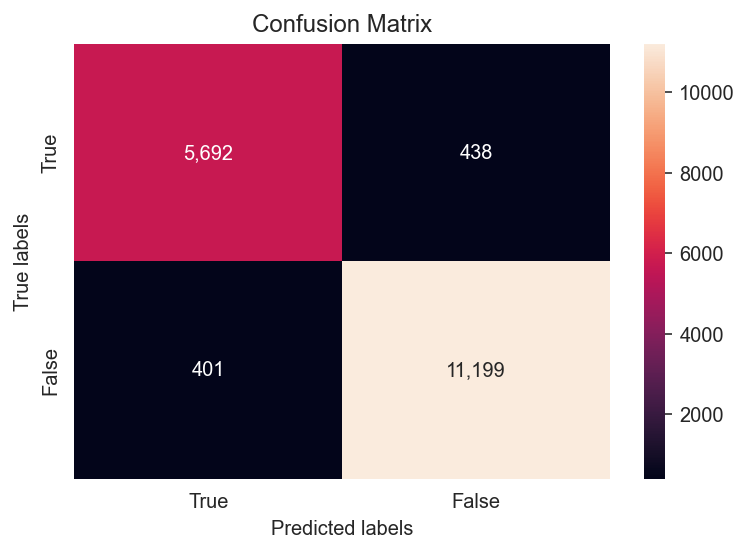

In [22]:
from bin.evaluation.evaluation import evaluate_classifier

evaluate_classifier(y_test, y_pred, y_pred, METRICS)